Generate 3 samples of plants where the true slope in the linear model = 0, and intercept = 14.9 (mean of all plants) or 12.3 (mean of the B plants). It is not important.
	
For each generated data set:
	
- Make a visualization using a violin plot of the relationship between genotype MASC06116 and generated fruit length .
- Calculate the slope in your generated data set using StatsModels AND using the rise over run method (WITH CODE not by eyeballing it).
- Explain how the visualization, the statsmodels slope, and the rise over run slope relate to each other.
    - Each visualization demonstrates how the distribution of plants with an 'A' genotype compares to the distribution of plants with a 'B' genotype
    - The slope generated from the statsmodels method demonstrates how much fruit length differs between plants with an 'A' genotype and a 'B' genotype. Since the true slope is 0, it makes sense that all of the values for slope for our randomly generated values are close to 0
    - The slope calculated from the rise-run method emphasizes that the slope of this model is simply the difference in average fruit_length between plants with an 'A' genotype and a 'B' genotype. This value only differs from the value calculated with the statsmodels method by fractions of a %

c:\Users\sjcde\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Slope for model 1: -0.1392410059718907
-0.13924100597189337
Slope for model 2: -0.12336054613082381
-0.12336054613082581
Slope for model 3: 0.20679489951273067
0.20679489951272778


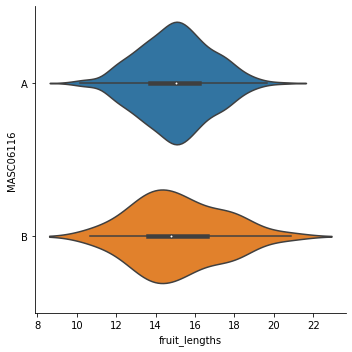

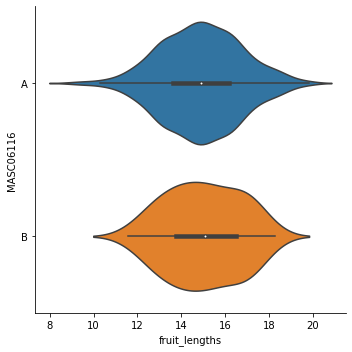

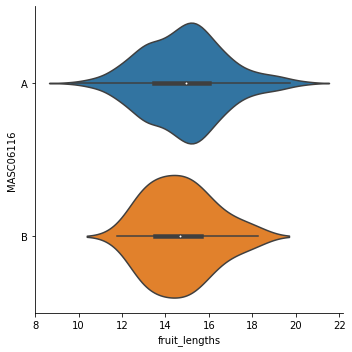

In [8]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
# Generate data
fruit_length_geno = pd.read_table("../data/arabmagic/fruit_length_geno.csv",sep=",",index_col=0)
binary_marker = (fruit_length_geno['MASC06116']=='A').astype(int)
to_model = pd.DataFrame({"fruit_length":fruit_length_geno['fruit_length'],
                         "MASC06116": binary_marker})
to_model = to_model[~pd.isnull(to_model['fruit_length'])]
binary_marker = (to_model['MASC06116']==1).astype(int)
to_model = sm.add_constant(to_model)

X = to_model.loc[:,("MASC06116","const")]

# Predict plant length using the model described in the problem definition
y = X["MASC06116"] * 0 + X["const"] * 14.9

# Find the standard deviation of fruit length (to use in the generated data)
std_data = to_model["fruit_length"].std()

# Generate 3 datasets using this model
datasets = []
for _ in range(3):
    datasets.append(norm.rvs(loc=y, scale = std_data))

# For each dataset
for i, dataset in enumerate(datasets, start=1):
    # Create a dataframe to represent the dataset
    display_df = pd.DataFrame({'fruit_lengths':dataset, 'MASC06116':fruit_length_geno.loc[~pd.isnull(fruit_length_geno['fruit_length']), 'MASC06116']})
    # Create a violin plot of the dataset, separated by genotype
    sns.catplot(data=display_df, x='fruit_lengths',kind='violin', y='MASC06116')
    # Calculate the slope of the dataset using the StatsModels method (print the result)
    print('Slope for model', str(i) + ':', sm.OLS(dataset, X).fit().params[0])
    # Calculate the slope of the dataset using the rise-run method (print the result)
    grouped = display_df.groupby('MASC06116').mean()
    mean_A = grouped.loc[grouped.index == 'A']['fruit_lengths'].item() # We can use .item() to get just the value
    mean_B = grouped.loc[grouped.index == 'B']['fruit_lengths'].item()
    print(mean_A - mean_B) # No need for a denominator, since the denominator would be 1-0 = 1